In [30]:
import sys
sys.path.insert(0,'..')

%matplotlib inline
import d2l  # d2l 패키지 임포트
from d2l import mxnet as d2l
from mxnet.gluon import data as gdata
import sys
import time

In [ ]:
mnist_train = gdata.vision.FashionMNIST(train=True)
mnist_test = gdata.vision.FashionMNIST(train=False)

In [ ]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [ ]:
feature, label = mnist_train[0]

In [6]:
feature.shape, feature.dtype

((28, 28, 1), numpy.uint8)

In [5]:
label, type(label), label.dtype

(2, numpy.int32, dtype('int32'))

In [7]:
def get_fashion_mnist_labels(labels):
  text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal,' , 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels]

In [22]:
def show_fashion_mnist(images, labels):
  d2l.use_svg_display() #SVG를 사용하여 이미지를 표시
  _, figs = d2l.plt.subplots(1, len(images), figsize=(12, 12)) # len(images) 개의 서브플롯을 가로로 1행에 배치한다
  for f, img, lbl in zip(figs, images, labels): #각 서브플롯, 이미지, 레이블에 대해 반복
    f.imshow(img.reshape((28,28)).asnumpy()) #이미지를 28x28 형태로 재구성하여 서브플롯에 표시, MXNet NDArray를 NumPy 배열로 변환
    f.set_title(lbl) #제목에 레이블 표시
    f.axes.get_xaxis().set_visible(False) # x축 숨기기
    f.axes.get_yaxis().set_visible(False) # y축 숨기기

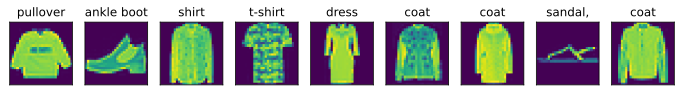

In [31]:
x,y = mnist_train[0:9]
show_fashion_mnist(x, get_fashion_mnist_labels(y))

In [32]:
#Fashion-MNIST 데이터셋을 로드하여 훈련 및 테스트 데이터로 나누고, 이를 배치 단위로 나누어 모델에 공급할 준비.
#배치 단위로 데이터를 공급하면 모델이 한 번에 여러 샘플을 처리할 수 있어 훈련 및 추론 속도가 빨라진다
#또한 데이터 변환 및 병렬 로딩을 통해 효율적인 데이터 처리가 가능

batch_size = 256
transformer = gdata.vision.transforms.ToTensor() # 이미지를 텐서(tensor)로 변환하는 객체. 이미지 데이터를 0과 1 사이의 값으로 정규화
if sys.platform.startswith('win'):
  num_workers = 0  # window면 0
else:
  num_workers = 4 # window가 아니면 4개의 워커 사용

train_iter = gdata.DataLoader(mnist_train.transform_first(transformer),
                              batch_size, shuffle=True,  # 데이터를 섞어서 훈련의 무작위성을 증가시켜 모델의 일반화 성능을 높인다
                              num_workers=num_workers)

test_iter = gdata.DataLoader(mnist_test.transform_first(transformer),
                             batch_size, shuffle=False, # 데이터 섞지않고 일관성 유지
                             num_workers=num_workers)

In [36]:
start = time.time()
for x,y in train_iter:
  continue
print('%.2f sec' % (time.time()-start))

'6.13 sec'